In [1]:
import sklearn
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data=load_breast_cancer()

In [3]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.3.
The scikit-learn version is 0.19.2.


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (
    cancer_data.data,cancer_data.target,stratify=cancer_data.target,shuffle =True, random_state=144)

In [5]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
print('score of our model: {:.3f}'.format(logreg.score(X_train,y_train)))
print('score of test model:{:.3f}'.format(logreg.score(X_test,y_test)))

score of our model: 0.962
score of test model:0.958


In [7]:
pred_logreg=logreg.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_logreg)
print('now the score of confusion metrics  \n{}'.format(confusion))

now the score of confusion metrics  
[[48  5]
 [ 1 89]]


In [9]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_logreg)

0.9673913043478262

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_logreg,target_names=['melignon','benign']))

             precision    recall  f1-score   support

   melignon       0.98      0.91      0.94        53
     benign       0.95      0.99      0.97        90

avg / total       0.96      0.96      0.96       143



In [20]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg.decision_function(X_test))

In [16]:
threshold 

array([ 10.27905708,   2.48592051,   2.29935121,   1.5145878 ,
         1.41808957,   1.25809581,   0.77894459,   0.53011935,
        -2.44861036,  -2.60531374, -48.82522166])

In [18]:
np.argmin(np.abs(threshold))

7

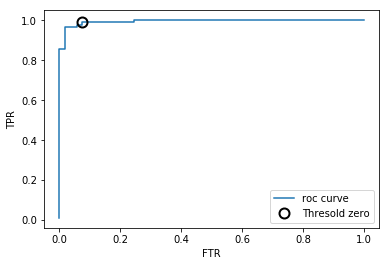

In [27]:
plt.plot(fpr,tpr,label='roc curve')
plt.xlabel('FTR')
plt.ylabel('TPR')
nearest_to_zero=np.argmin(np.abs(threshold))
plt.plot(fpr[nearest_to_zero],tpr[nearest_to_zero],'o',markersize=10,label='Thresold zero',fillstyle='none',c='k',mew=2)
plt.legend(loc=4)

In [29]:
from sklearn.metrics import roc_auc_score
log_reg_score=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print('aucsd for logging:{:.3f}'.format(log_reg_score))

aucsd for logging:0.994
